# Binary Classification using Tensorflow

We are going to do similar to the Regression Tensorflow workbook, but this time we are going to work at a classification problem

Back to the titanic.csv file we used before

In [1]:
import tensorflow as tf

C:\Users\dhurley\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read and clean data

We'll need to read in the data and do the following
- Remove any rows without Embarked filled in
- Fill in any missing ages with a median value
- Pick the columns we are going to build our model with
- Encode some columns - convert from text to numbers
  - Sex using label encoder
  - Embarked using Onehotencoder

Then we can start doing our Machine Learning process
- Train_test_split
- Normalise the data
- Write the base models
- Compile
- Fit
- Evaluate

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df = df[df["Embarked"].notnull()]

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
y = df["Survived"]
X = df[["Pclass","Age","Sex","SibSp","Parch","Fare","Embarked"]]

In [7]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(X['Sex'])
sex = le_sex.transform(X['Sex'])
X = X.drop(['Sex'], axis = 1)
X['Sex'] = sex
X

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,3,22.0,1,0,7.2500,S,1
1,1,38.0,1,0,71.2833,C,0
2,3,26.0,0,0,7.9250,S,0
3,1,35.0,1,0,53.1000,S,0
4,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,S,1
887,1,19.0,0,0,30.0000,S,0
888,3,28.0,1,2,23.4500,S,0
889,1,26.0,0,0,30.0000,C,1


There's probably a better way of doing this but it'll work so I don't care!

In [8]:
le_embark = preprocessing.OneHotEncoder(sparse_output=False)
le_embark.fit(X["Embarked"].values.reshape(-1,1))
embarked = le_embark.transform(X["Embarked"].values.reshape(-1,1))

In [9]:
X = X.drop(["Embarked"], axis = 1)

In [10]:
X["EmbarkC"] = embarked[:,0]
X["EmbarkQ"] = embarked[:,1]
X["EmbarkS"] = embarked[:,2]

In [11]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,EmbarkC,EmbarkQ,EmbarkS
0,3,22.0,1,0,7.2500,1,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1,0.0,0.0,1.0


Usual Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1138, train_size=0.8)

Normalisation like was done on the Regression workbook

In [15]:
from tensorflow.keras.layers import Normalization

In [16]:
normalizer = Normalization()

In [17]:
normalizer.adapt(X_train.values)

In [18]:
print('Normalized:', normalizer(X_train.values).numpy())

Normalized: [[-1.5950363   0.1471719  -0.46338156 ... -0.4819084  -0.3198837
   0.6256112 ]
 [ 0.80765593 -1.572492   -0.46338156 ... -0.4819084  -0.3198837
   0.6256112 ]
 [ 0.80765593 -0.08732773 -0.46338156 ...  2.0750833  -0.3198837
  -1.5984368 ]
 ...
 [-1.5950363  -0.08732773 -0.46338156 ... -0.4819084  -0.3198837
   0.6256112 ]
 [ 0.80765593 -0.7126601  -0.46338156 ... -0.4819084  -0.3198837
   0.6256112 ]
 [-0.39369014 -2.1978242   1.3031831  ... -0.4819084  -0.3198837
   0.6256112 ]]


## Model Number 1

We are just going to do a regular Logistic Regression model to start with

This just requires one output layer with one unit in it so it is the same as
$$\log\left(\frac{p}{1-p}\right) = w^Tx + b $$

This should be similar to using sklearn LogisticRegression()

We put the normalizer in as a layer

In [19]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (711, 9)                    │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

Trainable params is 10, we have 9 features (so 9 weights) and the bias b to be learnt as well

Our loss is going to be https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy as it is a binary problem

Read the manual even though the default is from_logits=False, they say Recommended Usage: (set from_logits=True). This depends on our output layer, if you look above I did not put any activation on the output layer, so the outputs will be logits

If I put above tf.keras.layers.Dense(1, activation='sigmoid') then from_logits=False is needed, but it is not recommended according to the manual

In [21]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy'],
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [22]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6705 - loss: 0.6717   
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8062 - loss: 0.4550 
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 0.4607
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7763 - loss: 0.4824 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8073 - loss: 0.4649 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.4643 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 0.4662 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.4189 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8156 - loss: 0.4266 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8114 - loss: 0.4505 
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.4865 
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Loss keeps decreasing, haven't use a validation set though. Could've done a different number of epochs

Be careful if you run .fit again. It continues on from where you left off, not starting from epoch 1 again

In [26]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7632 - loss: 0.5380 


[0.5012074708938599, 0.7865168452262878]

## Model Number 2

Now we are going to build a Neural Network

4 layers, 100 units in each hidden layer with relu as the activation function (you can try different structures if you want but for now I'm just demonstrating how Tensorflow works as well as some other things we can try)

In [27]:
model_tf = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [28]:
model_tf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

21301 trainable params, a lot more than the previous 10! Let's look at each layer

Input has 9 features Hidden Layer 1 has 100 units. Therefore the weight matrix is going to have 100 rows and 9 columns to match
$$ Wx + b $$

That gives us 900 paramaters for the weights. Then we have 100 biases - giving the total of 1000 parameters to go from input layer to hidden layer 1

Now from hidden layer 1 to hidden layer 2. 100 features, 100 units, gives us a 100x100 matrix so 10000 parameters, add in the 100 biases and we get the 10100

Let's compile and fit

In [29]:
model_tf.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'],
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [30]:
model_tf.fit(X_train, y_train, epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7343 - loss: 0.5548
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8242 - loss: 0.4176 
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7775 - loss: 0.4514 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8218 - loss: 0.4143 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8186 - loss: 0.3986 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.3863 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8474 - loss: 0.3715 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8351 - loss: 0.3917
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.3856 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8490 - loss: 0.3678
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8467 - loss: 0.3555
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

Again Loss keeps decreasing, haven't use a validation set though. Could've done a different number of epochs

In [31]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7632 - loss: 0.5380 


[0.5012074708938599, 0.7865168452262878]

In [32]:
model_tf.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8015 - loss: 1.1459  


[1.1118489503860474, 0.8089887499809265]

These are potentially overfit, we should have done some validation to check over things

While the accuracy for the test data is better, the loss is actually worse!

Let's add in validation. kFold Cross Validation would be nice but that's more difficult to do with tensorflow and requires writing our own functions so let's just take the last 20% as a validation set. Since we used train_test_split already, the data is already shuffled so it should be ok

In [33]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [36]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy'],
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [37]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6897 - loss: 0.6007 - val_accuracy: 0.8392 - val_loss: 0.3869
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8372 - loss: 0.4298 - val_accuracy: 0.8462 - val_loss: 0.4042
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.4091 - val_accuracy: 0.8392 - val_loss: 0.3919
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8230 - loss: 0.4303 - val_accuracy: 0.8531 - val_loss: 0.3870
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8124 - loss: 0.4414 - val_accuracy: 0.8462 - val_loss: 0.3940
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7941 - loss: 0.4640 - val_accuracy: 0.8322 - val_loss: 0.3962
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8070 - loss: 0.4465 - val_accuracy: 0.8252 - val_loss: 0.4013
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8117 - loss: 0.4262 - val_accuracy: 0.8531 - 

In [38]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

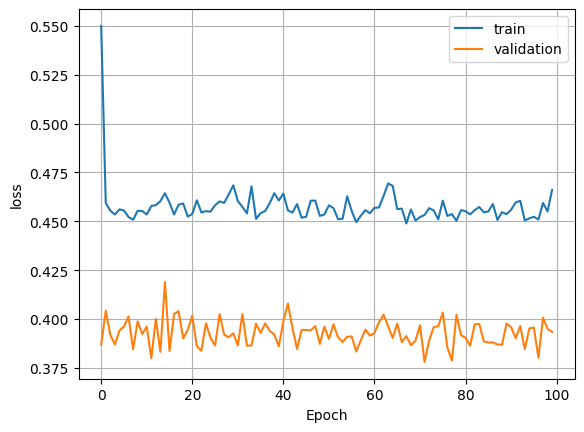

In [39]:
plot_loss(history)

In [40]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7473 - loss: 0.5271 


[0.49344488978385925, 0.7752808928489685]

Seems about the same performance on the test set. test_loss: 0.49344 - test_accuracy: 0.7752 are the final scores I got on this run. Your numbers will vary due to SGD

Now ANN

In [41]:
model_tf = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [43]:
model_tf.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'],
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [44]:
history = model_tf.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6309 - loss: 0.5820 - val_accuracy: 0.8462 - val_loss: 0.4691
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8283 - loss: 0.4056 - val_accuracy: 0.8601 - val_loss: 0.3771
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8034 - loss: 0.4180 - val_accuracy: 0.8531 - val_loss: 0.4010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8545 - loss: 0.3620 - val_accuracy: 0.8462 - val_loss: 0.4270
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8413 - loss: 0.3680 - val_accuracy: 0.8531 - val_loss: 0.4700
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8610 - loss: 0.3677 - val_accuracy: 0.8392 - val_loss: 0.4176
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8479 - loss: 0.3861 - val_accuracy: 0.8531 - val_loss: 0.4528
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8428 - loss: 0.3683 - val_accuracy: 0.8462 - 

Let's plot the loss graph

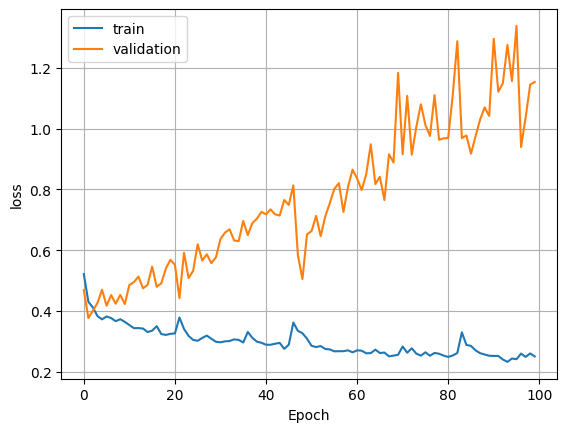

In [45]:
plot_loss(history)

Validation loss is a bit all over the place. This suggests overfitting to me

val_accuracy: 0.8322 - val_loss: 1.1535 was when I ran it which does not compare favourably to the previous simpler version. Neural Networks are not always better....even though the training loss and accuracy was better with the NN

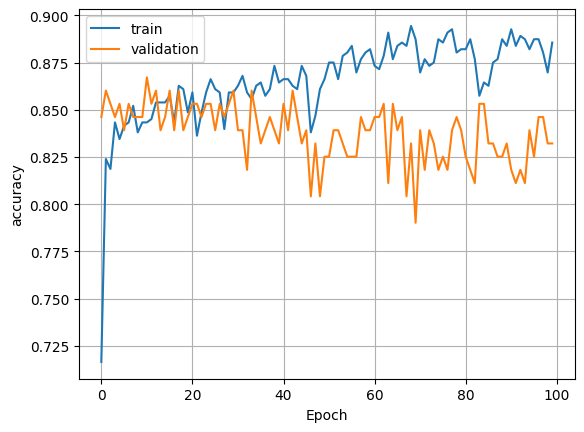

In [46]:
plot_loss(history, 'accuracy')

In [47]:
model_tf.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 1.6969 


[1.6786648035049438, 0.7977527976036072]

The NN did do better with the test set in terms of accuracy but loss quite a bit worse

## Regularisation

Ok, let's try smoothing some of that out with adding l2 regularisation to the layers

In [48]:
model_tf = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])

In [50]:
model_tf.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'],
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [51]:
history = model_tf.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7015 - loss: 1.8817 - val_accuracy: 0.8601 - val_loss: 0.6181
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7923 - loss: 0.6599 - val_accuracy: 0.8531 - val_loss: 0.5751
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8089 - loss: 0.5784 - val_accuracy: 0.8601 - val_loss: 0.4850
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8231 - loss: 0.5159 - val_accuracy: 0.8531 - val_loss: 0.4772
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8241 - loss: 0.4789 - val_accuracy: 0.8322 - val_loss: 0.4981
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8039 - loss: 0.5124 - val_accuracy: 0.8322 - val_loss: 0.4805
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8395 - loss: 0.4741 - val_accuracy: 0.8462 - val_loss: 0.4608
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8503 - loss: 0.4675 - val_accuracy: 0.8531 - 

val_accuracy: 0.8182 - val_loss: 0.4945, so loss is better than the last NN we build

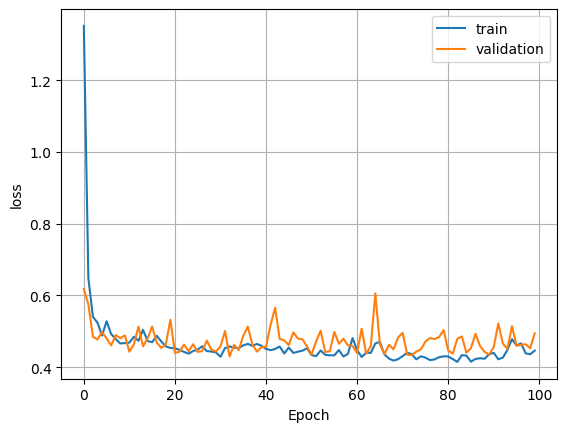

In [53]:
plot_loss(history)

That graph looks a lot better with some regularisation

In [54]:
model_tf.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8005 - loss: 0.5739 


[0.5542786717414856, 0.8089887499809265]

We could also look into applying Early Stopping to not do so many Epochs trying different structures of neural networks 